# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_function(data, correct_answers, f):
    for i in range(len(data)):
        answer = f(data[i])
        if answer != correct_answers[i]:
            print('WRONG ANSWER')
            print('Argument:', data[i])
            print('Correct answer:', correct_answers[i])
            print('Your answer:', answer)
            return
    print('SUCCESS')

## Problem 1: Longest run

Let `A` be a numpy 1D array of integers. We say that positions $i,i+1,\ldots,i+k-1$ form a **run** of length $k$ if
$A[i]=A[i+1]=\ldots=A[i+k-1]$. Write a function that returns the length of a longest run in `A`:

In [3]:
def longest_run(A):
    if len(A)==0:
        return 0
    maximum_run = 1
    current_run = 1
    for i in range(1,len(A)):
        if A[i]- A[i-1]==0:
            current_run+=1
            if current_run > maximum_run:
                maximum_run = current_run
        else:
            current_run = 1
    return maximum_run
                
    
  

Use the code below to test your function:

In [4]:
def generate_pseudorandom_array(n, k):
    m = 999331
    a = 8121
    b = 28411
    current = 91
    
    L = []
    for i in range(n):
        L.append(current % k)
        current = (a*current+b)%m
    return np.array(L)
data = [
    np.array([]),
    np.array([1]),
    np.array([1,2,1]),
    np.array([-1,-2,-2]),
    generate_pseudorandom_array(1000, 3),
    generate_pseudorandom_array(10000, 2),
    generate_pseudorandom_array(1000000, 2)
]
correct_answers = [0, 1, 1, 2, 7, 16, 16]
test_function(data, correct_answers, longest_run)

SUCCESS


## Problem 2: Lower upper

Write a function that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

Hint/reminder: To check if one character ``c`` is lowercase you use ``c.islower()``. To check uppercase you use ``c.isupper()``.

In [5]:
def count_letters(s):
    count1, count2 = 0,0
    for i in s:
        if i.islower():
            count1+=1
        elif i.isupper():
            count2+=1
    return [count1,count2]

In [6]:
count_letters('abc123ABC')

[3, 3]

Test your function using the code below:

In [7]:
data = [
    '',
    'abc',
    'ABC',
    'aBcDeFg',
    'AbCdEfG',
    'abc123ABC',
    '!2a!!!?'
]
correct_answers = [[0, 0], [3, 0], [0, 3], [4, 3], [3, 4], [3, 3], [1, 0]]
test_function(data, correct_answers, count_letters)

SUCCESS


## Problem 3: Sum of maximums

Write a function that takes one argument: A 2-dimensional **numpy array** of floats ``M`` and:
* For each column computes the maximum negative element.
* Returns the sum of those elements.

In [8]:

def sum_max_negative_columns(M):
    sum_total = 0 
    
    for column in np.transpose(M):
        neg_values = []
        for i in column:
            if i < 0:  
                neg_values.append(i)  
        if neg_values:  
            neg_max = max(neg_values)  
            sum_total += neg_max  
    
    return sum_total  


In [9]:
data = [
    np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]]),
    np.array([[-1., 4., 1., -2., -3., -5.],
             [1., 4., 1., -2., -3., -5.],
             [1., -4., 1., 2., 3., -5.]]),
    np.array([[-1000.], [-50.], [10.]]),
    np.array([[-1000., -50., 10.]])
]
correct_answers = [0, -15, -50, -1050]
test_function(data, correct_answers, sum_max_negative_columns)

SUCCESS


## Problem 4: Points on a circle

Write a function that takes a positive integer `n` and returns a pair of arrays `X, Y` such `(X[i],Y[i])` are `n` evenly spaced points on the unit circle $\{(x,y):x^2+y^2=1\}$. For example, for `n=4` your function can return `X=[1,0,-1,0]` and `Y=[0,1,0,-1]` (other correct answers are possible). Test your function on a few examples for different values of `n` and visualise the results.

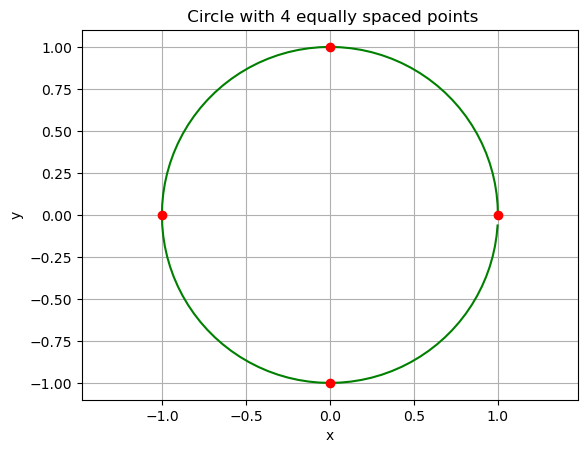

In [17]:
def circle_linspace(n):
    # Create empty lists for X and Y coordinates
    X= []
    Y = []
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    angle = np.random.uniform(0,2 * np.pi)
    theta_angle= (theta+angle)%(2 * np.pi)
    for i in theta:
        x = np.cos(i)
        X.append(x)
        y = np.sin(i)
        Y.append(y)
        
    return X, Y


n =4
X, Y = circle_linspace(n) 
circle_X, circle_Y = circle_linspace(100)  
plt.plot(circle_X, circle_Y, color='green')
plt.plot(X, Y, 'o',color='red')  
plt.xlim(-1, 1)
plt.ylim(-1,1 )
plt.axis('equal') 
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title(' Circle with ' + str(n) + ' equally spaced points')
plt.show()

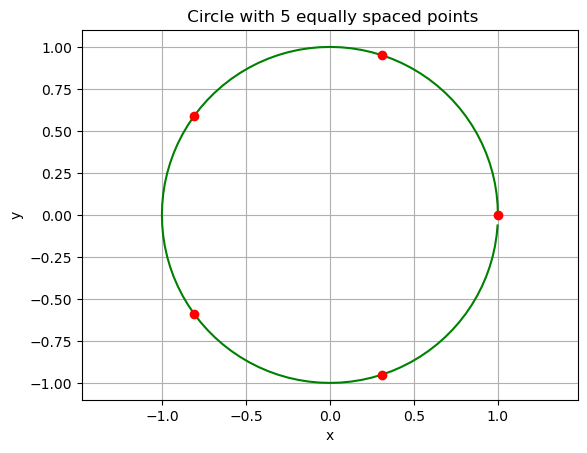

In [16]:
n = 5
X, Y = circle_linspace(n) 
circle_X, circle_Y = circle_linspace(100)  
plt.plot(circle_X, circle_Y, color='green')
plt.plot(X, Y, 'o',color='red')  
plt.xlim(-1, 1)
plt.ylim(-1,1 )
plt.axis('equal') 
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title(' Circle with ' + str(n) + ' equally spaced points')
plt.show()

## Problem 5: Newton method for computing square roots

Write a function that takes two arguments: floating-point positive numbers ``x`` and ``error_bound`` and returns the floating-point approximation of the square root of ``x``. The function should use Newton's method given by the formula:

$y_0 = x/2$

$y_{i+1} = \left(y_i + \frac{x}{y_i}\right) / 2$

You will need to decide when to stop the iteration. Use a ``while`` loop to stop when 

$|y_i - y_{i+1}| < \textrm{error\_bound}$

If you need to understand the method better, you can look it up on Wikipedia:
https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method

In [18]:
def newton_square_root(x, error_bound=1e-9):
    y_cur = x/2
    y_prev = 0.00
    while np.abs(y_cur- y_prev)> error_bound:
        y_prev = y_cur
        y_cur = (y_prev+ x/y_prev)/2
        
    return y_cur
    

In [19]:
newton_square_root(.04)

0.2

Test your method on some examples

**Bonus** Read on measuring execution time in Python (for example the ``timeit`` package). Compare the speed of your function (you should make many calls, for example 100000) for different error bounds. Also compare with Python functions ``math.sqrt`` and `np.sqrt`.

## Problem 6: Special triples

* Write a function that takes two inputs: positive integers `x` and `y`. The function outputs `True` if the digits of `y` are a permutation of digits of `x`. Please consult the testing code to make sure you understand the problem statement.

In [20]:
def is_permutation(x, y):
    str1 = str(x)
    str2 = str(y)
    if len(str1) - len(str2) != 0:
        return False
    
    return sorted(str1) == sorted(str2)


In [21]:
data = [
    (123, 124),
    (11, 111),
    (178, 871),
    (1151, 5111),
    (2123, 1223),
    (1266, 2116)
]
correct_answers = [False, False, True, True, True, False]
def test_permutation(data, correct_answers, f):
    for i in range(len(data)):
        answer = f(*data[i])
        if answer != correct_answers[i]:
            print('WRONG ANSWER')
            print('Argument:', data[i])
            print('Correct answer:', correct_answers[i])
            print('Your answer:', answer)
            return
    print('SUCCESS')

In [22]:
test_permutation(data, correct_answers, is_permutation)

SUCCESS


* Use the function `is_permutation` and other Python code to find all triples of integers $0<a<b<c<10^4$ such that:
    1) $a,b,c$ are an arithmetic progression, that is $b-a=c-b$.
    2) All of $a,b,c$ are prime numbers.
    3) Digits of $a,b,c$ are permutations of each other.

## Problem 7: Snake list

Write a function that takes as input a square matrix (list of lists) and returns a list which contains all elements from the matrix in a "snake" (spiral) fashion.

In [23]:
def snake_list(M):
    snake_list = []
    M = np.array(M)
    while M.size:
        snake_list.extend(M[0])
        M = M[1:]
        if M.size:
            M = np.rot90(M)
    return snake_list

In [24]:
M = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print(snake_list(M))

[1, 2, 3, 6, 9, 8, 7, 4, 5]


For the matrix above ``snake_list`` should return the list ``[1, 2, 3, 6, 9, 8, 7, 4, 5]``.

In [25]:
M2 = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]


In [26]:
print(snake_list(M2))

[1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10]


And for this one it should return ``[1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10]``.

## Problem 8: Neural networks

A **fully-connected ReLU neural network with one hidden layer** with $d$ **inputs**, $n$ **hidden neurons** and $o$ **outputs** is defined by four arrays of real parameters (**weights**):

$$W\in\mathbb{R}^{d\times n},b\in\mathbb{R}^n,V\in\mathbb{R}^{n\times o},b'\in\mathbb{R}^{o}$$

Given the parameters $\theta=(W,b,V,b')$, the neural network computes a function $f_\theta:\mathbb{R}^d\to\mathbb{R}^o$ using the formula:

$$f_\theta(x)_k = b'_k+\sum_{j=1}^n V_{jk}\mathrm{ReLU}\left(b_j+\sum_{i=1}^d W_{ij}x_i\right)\text{ for }k=1,\ldots,o\;.$$

Using matrix notation (and applying ReLU componentwise), we can write this as

$$ \text{Eq. (1):}\qquad\qquad f_\theta(x) = b'+ V^T \mathrm{ReLU}( b+ W^T x) $$

In this problem, we consider a neural network solution for the problem of **handwritten digit classification**. This is a well-known problem for which we will use a public dataset called MNIST. Our input will be grayscale (black-white) pictures with $28\times 28=784$ pixels. Therefore, we will take
$d=784$. The problem we are solving is classifying the digits into one of the values $0,1,\ldots,9$. Accordingly, we will take the number of outputs $o=10$. The network's output (which is a vector with 10 coordinates) is given by Eq. (1). Then, the network's **prediction** will be the index of the output coordinate (neuron) which gave the largest value. Mathematically,

$$ \text{Eq. (2):}\qquad\qquad\mathrm{pred}_{\theta}(x)=\mathrm{argmax}_{k=0,1,\ldots,9}\; f_\theta(x)_k\;.$$

a) Download `mnist_input.npz` and `mnist_weights.npz` files. Several numpy arrays are stored inside those files. Use numpy `np.load` function to load those arrays into memory

In [27]:
mnist_weights = np.load('mnist_weights.npz')
mnist_input = np.load('mnist_inputs.npz')


In [28]:
images = mnist_input['images']
label = mnist_input['labels']

# splitting the weights
W = mnist_weights['W']
b = mnist_weights['b']
V = mnist_weights['V']
b_prime = mnist_weights['bprime']

b) First, consider `images` and `labels` arrays loaded from `mnist_inputs.npz`. Given index `i`, the element `images[i]` represents a $28\times 28$ black-white picture with a handwritten digit. Then, the element `labels[i]` is an integer specifying which digit is in the picture.

Use `matplotlib` to visualise some example images and check their labels. Hint: look up `np.reshape` and `plt.imshow` functions.

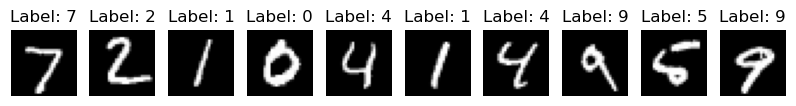

In [29]:
def visualize_image(images, label,images_num=10):
    plt.figure(figsize=(10, 2))
    for i in range(images_num):
        image = images[i].reshape(28, 28)
        plt.subplot(1, images_num, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label[i]}')
        plt.axis('off')
    plt.show()


visualize_image(images, label)

c) Create a `NeuralNetwork` class with methods `__init__`, `evaluate` and `predict`. Look in the comments for further instructions:

In [30]:
class NeuralNetwork:
    def __init__(self, W, b, V, b_prime):

        self.W = W
        self.b = b
        self.V = V
        self.b_prime = b_prime
    
    def relu(self, x):

        return np.maximum(0, x)

    def evaluate(self, x):
        if x.ndim == 1:
            y = np.dot(self.W.T, x) + self.b
            y = np.dot(self.W.T, x) + self.b
            m = self.relu(y)
            output = np.dot(self.V.T, m) + self.b_prime
        else:
            
            y = np.dot(x, self.W) + self.b
            m = self.relu(y)
            output = np.dot(m, self.V )+ self.b_prime

        return output
    def predict(self, x):
        output = self.evaluate(x)
        if x.ndim == 1:  
            return np.argmax(output)
        else:
            return np.argmax(output, axis=1)

    def get_accuracy(self, x, labels):

        prediction = self.predict(x)
        total_prediction = np.sum(prediction == labels)
        accurate = total_prediction / len(labels)
        
        return accurate


d) Test your function on:
* Random weight matrices initialized according to the standard Gaussian distribution. Try a few different values of $n$. Can you interpret the results?
* The weight matrices loaded from the `mnist_weights.npz` file. What is the $n$ of those weights? What is the accuracy? 

In [31]:
neural = NeuralNetwork(W, b, V, b_prime)

In [32]:
#single image test
single_image = images[0]
print("single image output:")
print(neural.evaluate(single_image))

single image output:
[ -0.45998187 -11.95910649   1.75289867   4.18892743  -3.42243753
   0.30823608  -7.76776153   9.92415517  -0.93978193   3.22780885]


In [33]:
print(" First 200 images accuracy:")
print(neural.get_accuracy(images[:200], label[:200]))

 First 200 images accuracy:
0.96


In [34]:
print("First 2000 images accuracy:")
print(neural.get_accuracy(images[:2000], label[:2000]))

First 2000 images accuracy:
0.9135


## Problem 9: Working with files

This exercise is to practice working with files. 

There is a file ``sorted_small.txt`` included with this assignment. Solve the problem described below reading your inputs from the file.

**Please read the following instructions carefully.** The file contains a number of inputs. **Each input consists of three lines**:
* The first line contains two integers $1 \le a \le b$.
* The second line contains one integer $1 \le n$.
* The third line contains $n$ sorted integers $$1 \le s_1 \le s_2 \le \ldots \le s_n.$$

All integers on a line are separated by spaces. **You can open the file and see for yourself to understand the input**.

For each input, you should output ``True`` or ``False``. You should output ``True`` if there exists $1\le i \le n$ such that
$$a \le s_i \le b.$$

**Make a list of all your outputs and compare it with the list of correct answers below**.

In [35]:
def check_condition(file_name):
    outputs = []
    with open(file_name, 'r') as file:
        while True:
            # Read the first line containing a and b
            line = file.readline()
            if not line:
                break
            a,  b = map(int, line.strip().split())
            
            # Read the second line containing m
            m_line= int(file.readline().strip())
            
            # Read the third line containing sorted integers
            sorted_integersline = list(map(int, file.readline().strip().split()))
            
            # Check if there exists s such that a <= s <= b
            result = any(a <= s <= b for s in sorted_integersline)
            outputs.append(result)
    
    return outputs



In [36]:

file_name = 'sorted_small.txt'
outputs = check_condition(file_name)


print(outputs)


[False, True, True, False, True, False, False, True, False, True, True, True, True, False, False, False]


In [37]:
correct_answers = [False, True, True, False, True, False, False, True, False, True, True, True, True, False, False, False]

BONUS: You can try writing "binary search" instead of going through the list left-to-right.

## Problem 10: Sorting lectures 

Create a class `Lecture` such that each object contains three attributes (variables) `starting_time`, `finish_time` and `id_number`. Write the `__init__`, `__str__` and `__lt__` methods so that you can sort the a list of lectures according to the starting time. Create a list of lectures to test your class.


In [38]:
class Lecture:
    def __init__(self, starting_time, finish_time, id_number):
        self.starting_time = starting_time  
        self.finish_time = finish_time  
        self.id_number = id_number 
    def __str__(self):
        s = 'starting_time:\t%s\tfinish_time:\t%s\tid_number:\t%d' % (self.starting_time, self.finish_time, self.id_number)
        return s
   
    
    def __lt__(self, other):
        return self.starting_time < other.starting_time

   

In [39]:
lectures = [
    Lecture("09:00", "10:00", 101),
    Lecture("08:30", "09:30", 102),
    Lecture("07:30", "08:30", 103),
    Lecture("11:00", "12:00", 104)
]


for lecture in lectures:
    print(lecture)


starting_time:	09:00	finish_time:	10:00	id_number:	101
starting_time:	08:30	finish_time:	09:30	id_number:	102
starting_time:	07:30	finish_time:	08:30	id_number:	103
starting_time:	11:00	finish_time:	12:00	id_number:	104


## Problem 11: Scheduling classrooms

You are the head tutor in charge of AIMS schedule. The building has $k$ classrooms numbered from 1 to $k$ and you are given a list of $n$ lectures. Each lecture is a pair of integers $(s_i, f_i)$ where $s_i$ is the starting time and $f_i$ the finishing time of the lecture, $0\le s_i\le f_i\le 10^6$. Your task is to assign classrooms to lectures, so that no two lectures that overlap in time are assigned to the same room. If one lecture finishes at exactly the same time as another lecture starts, you are allowed to place them in the same room.

Return a list of $n$ integers, where for every lecture you specify the room. If it is not possible to schedule all lectures, return the integer $-1$.

In [40]:
def schedule_classes(k, L):
    
    n = len(L)
    L.sort()
    assigned_room =[]
    for _ in range(n):
         assigned_room.append(0)
            
    end_time =[]
    for _ in range(k):
         end_time.append(0)
            
    if k >= n:
        return list(range( n + 1))
    
    for i in range(n):
        start_lecture = L[i][0]
        end_lecture = L[i][1]
        assigned = False
        
        for j in range(k):
            if end_time[j] <= start_lecture:
                
                assigned_room[i] = j + 1
                end_time[j] = end_lecture
                assigned = True
                break
        
        else:
            return -1
    
    return assigned_room


k = 1 
L = [(3, 6), (1, 4)] 
print(schedule_classes(k, L))  


-1


**Examples** On input `k=1` and `L=[(3, 5), (1, 3)]`, the output should be
`[1, 1]`, as you have to put all lectures in the only classroom available. It is fine that the first lecture starts at the same time as the second lecture ends.

For input `k=1` and `L=[(3, 6), (1, 4)]`, the output is `-1`, as from time 3 to 4 there are two lectures at the same time.

For `k=2` and `L=[(3, 6), (1, 4)]`, the output can be `[1, 2]`. However, it is not the only correct output.

For `k=2` and `L=[(4, 7), (9, 12), (5, 8), (2, 5), (1, 3)]`, a correct output is `[1, 1, 2, 2, 1]`. Again, the correct output is not unique.